<a href="https://colab.research.google.com/github/metard/yza-classification-xai/blob/main/Breast_Cancer_Wisconsin_YSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Yıldırım

# Yapay Sinir Ağları Vize Projesi  
### Breast Cancer Wisconsin Veriseti ile MLP Sınıflandırma + Optuna + SHAP
**Hazırlayan:** Selçuk Yıldırım  
**Ders:** Yapay Sinir Ağları (MLP / XAI)  - Gökalp Tulum

**İçerik:**  
- Veri yükleme  
- Veri kalitesi kontrolü  
- EDA  
- Scaling  
- Train/Val/Test bölme  
- 5 MLP model  
- Optuna hiperparametre optimizasyonu  
- SHAP açıklanabilirlik  
- Sonuç değerlendirme  

## 1.Adım: Kütüphanelerin Oluşturulması ve Veri setinin hazırlanması

In [1]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Breast Cancer veri setini yükle
data = load_breast_cancer()

# Özellikler ve hedef değişkeni ayır
X = data.data
y = data.target

# Özellikleri ve hedefi DataFrame formatına çevir
df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)

# İlk 5 satırı görüntüle
display(df.head())

# Kısa yorum: Veri seti başarıyla yüklendi, DataFrame'e aktarıldı ve ilk 5 satır incelendi.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2.Adım: Eksik Değer ve Aykırı Değer (Outlier) Analizi, Veri tipi ve Dağılımı Analizi

Eksik değer sayısı (her sütun):
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Eksik değer bulunmamaktadır.

Aykırı değer sayısı (Z-sc

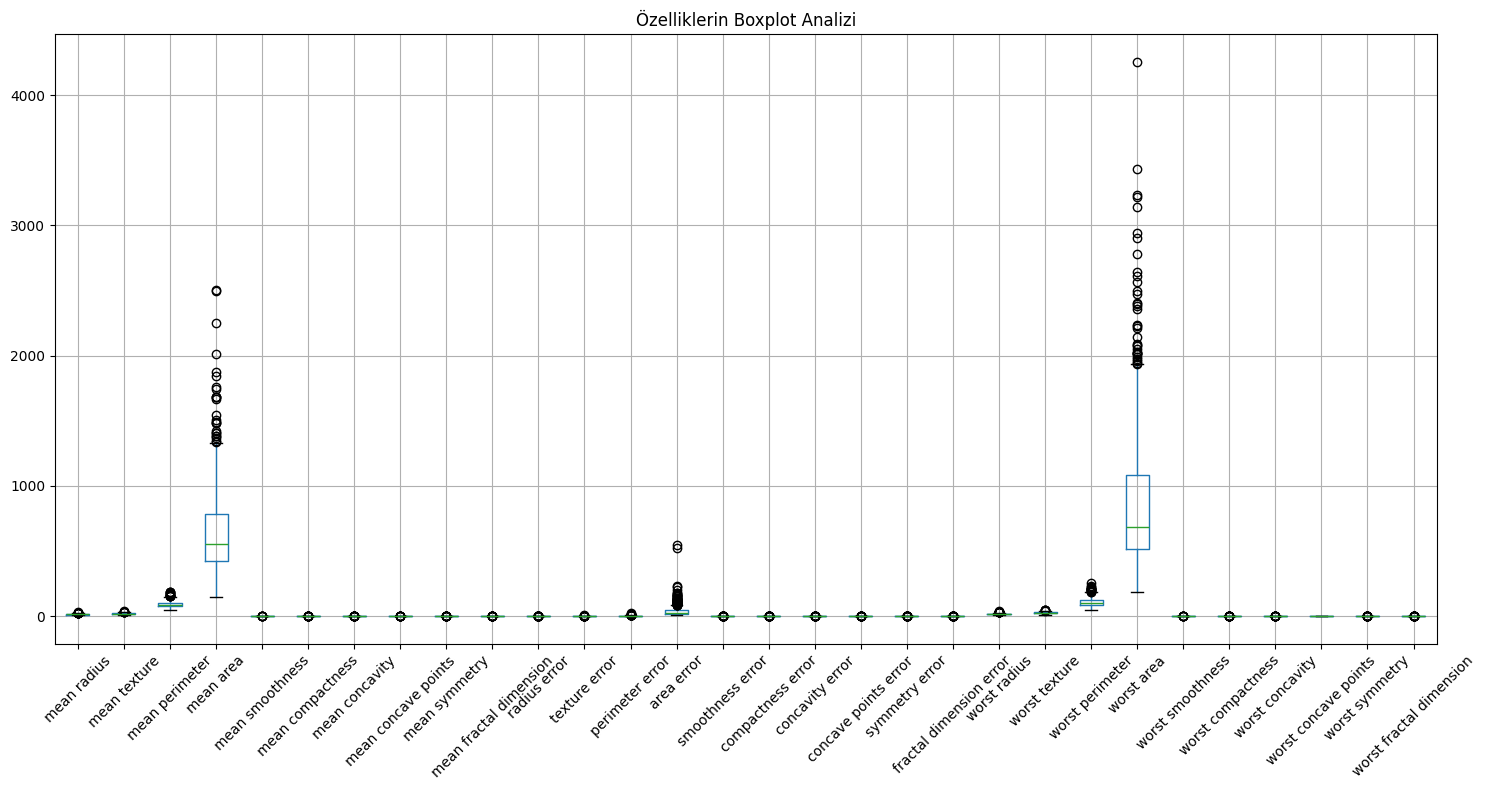


Sayısal değişken sayısı: 31
Kategorik değişken sayısı: 0

Sütunların veri tipi bilgisi:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
w

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri yüklemesi. Varsayım: 'df' zaten mevcut. Eğer yoksa baştan yükleyelim:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)

# 2.1 Eksik Değer Analizi
missing = df.isnull().sum()
print("Eksik değer sayısı (her sütun):\n", missing)

# Eksik değer doldurma örneği (gerekirse):
if missing.sum() > 0:
    # Sayısal değişkenler için ortalama ile doldurma
    df.fillna(df.mean(numeric_only=True), inplace=True)
    print("Eksik değerler ortalama ile dolduruldu.")
else:
    print("Eksik değer bulunmamaktadır.")

# 2.2 Aykırı Değer Analizi (Z-score yöntemi ile)
z_scores = np.abs(stats.zscore(df_X))
outliers = (z_scores > 3).sum(axis=0)
print("\nAykırı değer sayısı (Z-score > 3) (her sütun):\n", pd.Series(outliers, index=df_X.columns))

# Ayrıca tüm sütunlar için boxplot çizimi (görselle inceleme)
plt.figure(figsize=(15, 8))
df_X.boxplot(rot=45)
plt.title('Özelliklerin Boxplot Analizi')
plt.tight_layout()
plt.show()

# 2.3 Veri Tipi ve Dağılım İncelemesi
# Sayısal ve kategorik değişken sayısı
num_vars = df.select_dtypes(include=np.number).shape[1]
cat_vars = df.select_dtypes(exclude=np.number).shape[1]
print(f"\nSayısal değişken sayısı: {num_vars}")
print(f"Kategorik değişken sayısı: {cat_vars}")

# DataFrame sütun tipleri
print("\nSütunların veri tipi bilgisi:")
print(df.dtypes)

